In [97]:
import tensorflow as tf
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
#csv는 엑셀과 달리 , 를 통해 데이터를 구분
colors = ["black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" ,"black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan", "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan", "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate"]
# 한글 폰트 사용을 위해서 세팅

import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [73]:
# 혼잡도 데이터
row_data_frame = pd.read_csv("./new_model_data.csv", encoding = 'cp949',low_memory=False) 
row_data_frame.columns = ['label',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
row_data_frame.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,15,2,7,19,46,61,72,80,116,139,158,146,129,113,125,111,80,46
1,15,2,82,75,224,340,372,531,528,537,656,553,343,255,245,152,122,47
2,13,1,11,52,194,325,306,488,558,469,599,492,325,291,249,121,85,34
3,15,4,10,29,60,94,109,146,178,156,175,164,127,110,108,119,78,32
4,15,1,0,0,7,21,33,44,58,86,88,72,69,62,61,47,43,17


In [74]:
label_set = list(row_data_frame['label'])
len(label_set)

1779

In [75]:
# 이미지데이터
tmp_img_data = []
with open('./rev_img_data.csv', mode = 'r', newline='') as img:
    
    #read TSP city map
    reader = csv.reader(img)
    for row in reader: # -> 가로 축으로 읽으므로 각 열 별로[x,y] 형태로 들어가게 된다
        tmp_img_data.append(list(map(int,row[1:])))
print(tmp_img_data[:2])
tmp_img_data.pop(0) # time 부분 빼주기
print("\n",tmp_img_data[:3])
print('img_data 에 들어간 원소의 개수 :',len(tmp_img_data))

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], [0, 8, 27, 71, 96, 114, 127, 186, 223, 255, 235, 207, 181, 201, 178, 127, 71]]

 [[0, 8, 27, 71, 96, 114, 127, 186, 223, 255, 235, 207, 181, 201, 178, 127, 71], [0, 31, 28, 86, 131, 144, 206, 205, 208, 255, 214, 132, 98, 94, 58, 46, 17], [0, 4, 21, 82, 138, 130, 207, 237, 199, 255, 209, 138, 123, 105, 51, 35, 14]]
img_data 에 들어간 원소의 개수 : 1779


# 이미지를 만들어주기

In [76]:
img_set = []
for i in range (0, len(tmp_img_data)):    
    tmp_img = []
    for _ in range (0,10):
        tmp_img.append(tmp_img_data[i])
    img_set.append(np.array(tmp_img))

In [77]:
img_set[:4]

[array([[  0,   8,  27,  71,  96, 114, 127, 186, 223, 255, 235, 207, 181,
         201, 178, 127,  71],
        [  0,   8,  27,  71,  96, 114, 127, 186, 223, 255, 235, 207, 181,
         201, 178, 127,  71],
        [  0,   8,  27,  71,  96, 114, 127, 186, 223, 255, 235, 207, 181,
         201, 178, 127,  71],
        [  0,   8,  27,  71,  96, 114, 127, 186, 223, 255, 235, 207, 181,
         201, 178, 127,  71],
        [  0,   8,  27,  71,  96, 114, 127, 186, 223, 255, 235, 207, 181,
         201, 178, 127,  71],
        [  0,   8,  27,  71,  96, 114, 127, 186, 223, 255, 235, 207, 181,
         201, 178, 127,  71],
        [  0,   8,  27,  71,  96, 114, 127, 186, 223, 255, 235, 207, 181,
         201, 178, 127,  71],
        [  0,   8,  27,  71,  96, 114, 127, 186, 223, 255, 235, 207, 181,
         201, 178, 127,  71],
        [  0,   8,  27,  71,  96, 114, 127, 186, 223, 255, 235, 207, 181,
         201, 178, 127,  71],
        [  0,   8,  27,  71,  96, 114, 127, 186, 223, 255, 235, 

In [78]:
img_set = np.array(img_set)
label_set = np.array(label_set)

In [79]:
len(img_set),len(label_set)

(1779, 1779)

# train data 와 test data 만들기

6:2:2 -> train : 1067  vaild : 356  test: 356

4:3:3  -> train : 713  vaild : 533  test: 533

5:2:3   -> train : 890  vaild : 356  test: 533

In [80]:
########################################
NUM_VAL_TRAIN = 1067 + 356
########################################
X_val_train = img_set[:NUM_VAL_TRAIN]
Y_val_train = label_set[:NUM_VAL_TRAIN]
X_test = img_set[NUM_VAL_TRAIN:]
Y_test = label_set[NUM_VAL_TRAIN:]

In [81]:
len(X_val_train),len(Y_val_train),len(X_test),len(Y_test)

(1423, 1423, 356, 356)

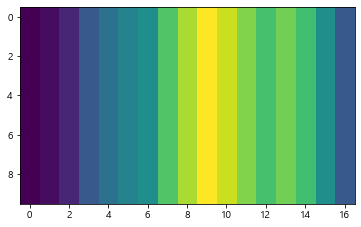

In [82]:
plt.imshow(X_val_train[0])

In [83]:
X_val_train.shape,Y_val_train.shape

((1423, 10, 17), (1423,))

In [84]:
print(X_val_train[0])

[[  0   8  27  71  96 114 127 186 223 255 235 207 181 201 178 127  71]
 [  0   8  27  71  96 114 127 186 223 255 235 207 181 201 178 127  71]
 [  0   8  27  71  96 114 127 186 223 255 235 207 181 201 178 127  71]
 [  0   8  27  71  96 114 127 186 223 255 235 207 181 201 178 127  71]
 [  0   8  27  71  96 114 127 186 223 255 235 207 181 201 178 127  71]
 [  0   8  27  71  96 114 127 186 223 255 235 207 181 201 178 127  71]
 [  0   8  27  71  96 114 127 186 223 255 235 207 181 201 178 127  71]
 [  0   8  27  71  96 114 127 186 223 255 235 207 181 201 178 127  71]
 [  0   8  27  71  96 114 127 186 223 255 235 207 181 201 178 127  71]
 [  0   8  27  71  96 114 127 186 223 255 235 207 181 201 178 127  71]]


# 픽셀화를 적용해주자

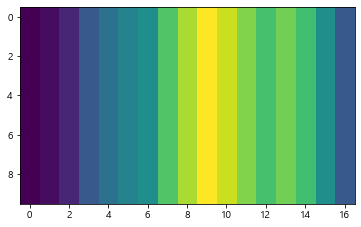

In [91]:
X_val_train = X_val_train.reshape(len(X_val_train),10,17,1)
X_test.reshape(len(X_test),10,17,1)
plt.imshow(X_val_train[0])

In [92]:
X_val_train[0][:2]

array([[[  0],
        [  8],
        [ 27],
        [ 71],
        [ 96],
        [114],
        [127],
        [186],
        [223],
        [255],
        [235],
        [207],
        [181],
        [201],
        [178],
        [127],
        [ 71]],

       [[  0],
        [  8],
        [ 27],
        [ 71],
        [ 96],
        [114],
        [127],
        [186],
        [223],
        [255],
        [235],
        [207],
        [181],
        [201],
        [178],
        [127],
        [ 71]]])

In [94]:
X_val_train.shape,Y_val_train.shape

((1423, 10, 17, 1), (1423,))

In [111]:
unique, count = np.unique(label_set,return_counts = True)
len(unique)

14

In [119]:
print(Y_val_train[0])
from tensorflow.keras.utils import to_categorical
Y_val_train = to_categorical(train_labels, 14)
Y_test= to_categorical(test_labels, 14)
Y_val_train[0]

15


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

##################
BATCH_SIZE = 10
EPOCH=10, 
VAILD=0.2 # 0.8은 train
#############################

In [120]:
img_height = 10
img_width = 17
model = Sequential()
model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=4, padding='same', strides=1, activation='relu', input_shape=(img_height,img_width,1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
#model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4, padding='same', strides=1, activation='relu'))
#model.add(tf.keras.layers.MaxPool2D(pool_size=2))
#model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=4, padding='same', strides=1, activation='relu'))
#model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(len(unique), activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 10, 17, 8)         136       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 8, 8)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 14)                4494      
Total params: 4,630
Trainable params: 4,630
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_val_train, Y_val_train, batch_size=BATCH_SIZE, epochs=10, validation_split=0.2)

Epoch 1/10
